<a href="https://colab.research.google.com/github/AntonioBMesquita/Challenge-Telecomx-2/blob/main/TelecomX_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Telecom X Parte 2

##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick
import warnings
warnings.filterwarnings('ignore')

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/AntonioBMesquita/Challenge-Telecomx-2/refs/heads/main/data/TelecomX_Dados_Tratados.csv')
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Diary
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [3]:
dados.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Charges.Diary
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.158675
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.990000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [4]:
dados.describe(include='object')

,customerID,gender,InternetService,Contract,PaymentMethod
count,7043,7043,7043,7043,7043
unique,7043,2,3,3,4
top,9995-HOTOH,Male,Fiber optic,Month-to-month,Electronic check
freq,1,3555,3096,3875,2365


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   object 


## Visualização gráfica dos dados

In [6]:
evasao = dados['Churn'].value_counts().reset_index()
evasao.columns = ['Churn', 'Count']
evasao

,Churn,Count
0,0,5174
1,1,1869


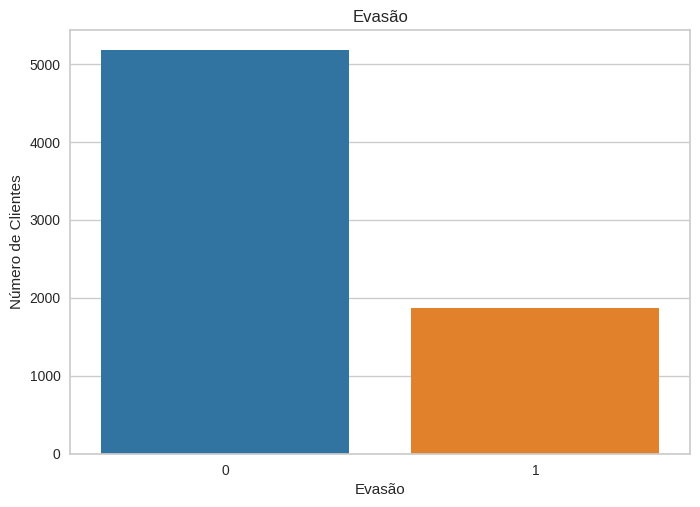

In [7]:
sns.barplot(x='Churn', y='Count', data=evasao, palette='tab10')
plt.title('Evasão')
plt.xlabel('Evasão')
plt.ylabel('Número de Clientes')
plt.show()

In [8]:
tipo_internet = dados.groupby('InternetService')['Churn'].value_counts().reset_index()
tipo_internet.columns = ['InternetService', 'Churn', 'Count']
tipo_internet

,InternetService,Churn,Count
0,DSL,0,1962
1,DSL,1,459
2,Fiber optic,0,1799
3,Fiber optic,1,1297
4,No,0,1413
5,No,1,113


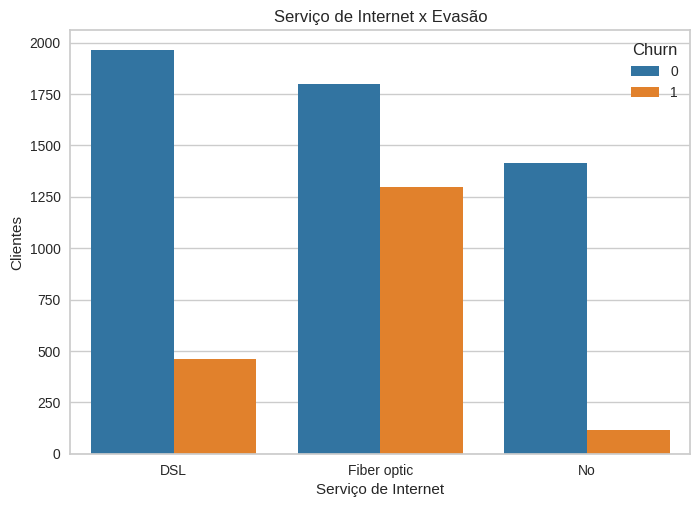

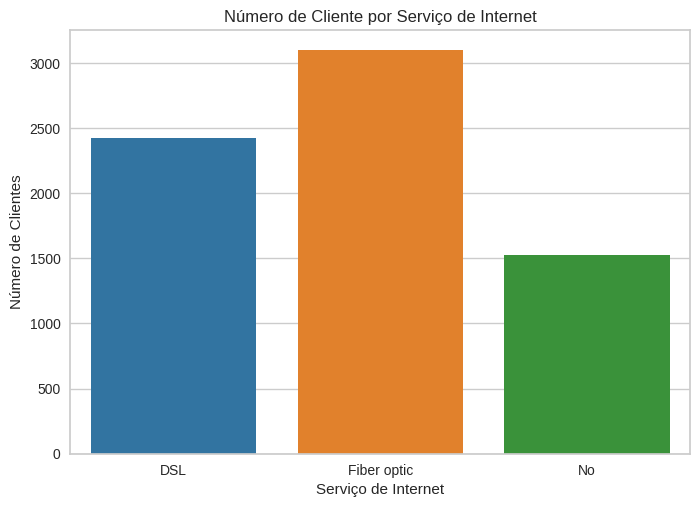

In [9]:
sns.barplot(x='InternetService', y='Count', hue='Churn', data=tipo_internet, palette='tab10')
plt.title('Serviço de Internet x Evasão')
plt.xlabel('Serviço de Internet')
plt.ylabel('Clientes')
plt.show()


sns.countplot(x='InternetService', data=dados, palette='tab10')
plt.title('Número de Cliente por Serviço de Internet')
plt.xlabel('Serviço de Internet')
plt.ylabel('Número de Clientes')
plt.show()


In [10]:
tipo_contrato = dados.groupby('Contract')['Churn'].value_counts().reset_index()
tipo_contrato.columns = ['Contract', 'Churn', 'Count']
tipo_contrato

,Contract,Churn,Count
0,Month-to-month,0,2220
1,Month-to-month,1,1655
2,One year,0,1307
3,One year,1,166
4,Two year,0,1647
5,Two year,1,48


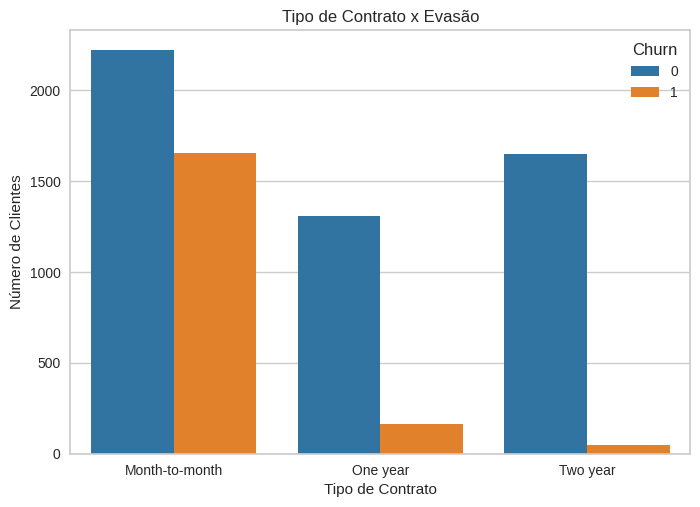

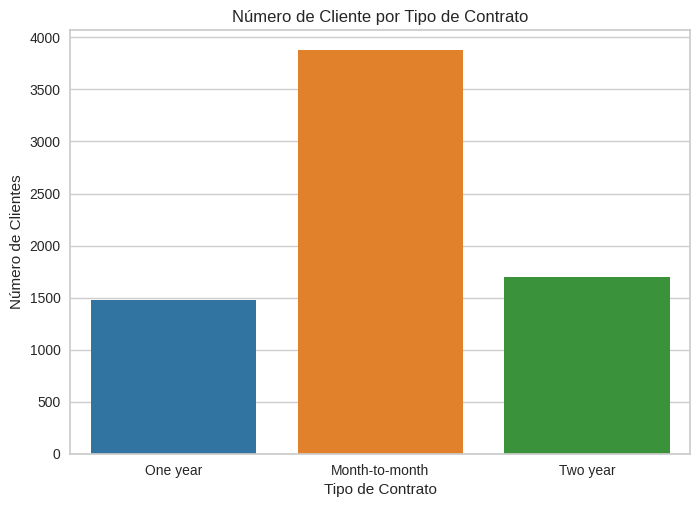

In [11]:
sns.barplot(x='Contract', y='Count', hue='Churn', data=tipo_contrato, palette='tab10')
plt.title('Tipo de Contrato x Evasão')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()


sns.countplot(x='Contract', data=dados, palette='tab10')
plt.title('Número de Cliente por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()


In [12]:
tipo_pagamento = dados.groupby('PaymentMethod')['Churn'].value_counts().reset_index()
tipo_pagamento.columns = ['PaymentMethod', 'Churn', 'Count']
tipo_pagamento

,PaymentMethod,Churn,Count
0,Bank transfer (automatic),0,1286
1,Bank transfer (automatic),1,258
2,Credit card (automatic),0,1290
3,Credit card (automatic),1,232
4,Electronic check,0,1294
5,Electronic check,1,1071
6,Mailed check,0,1304
7,Mailed check,1,308


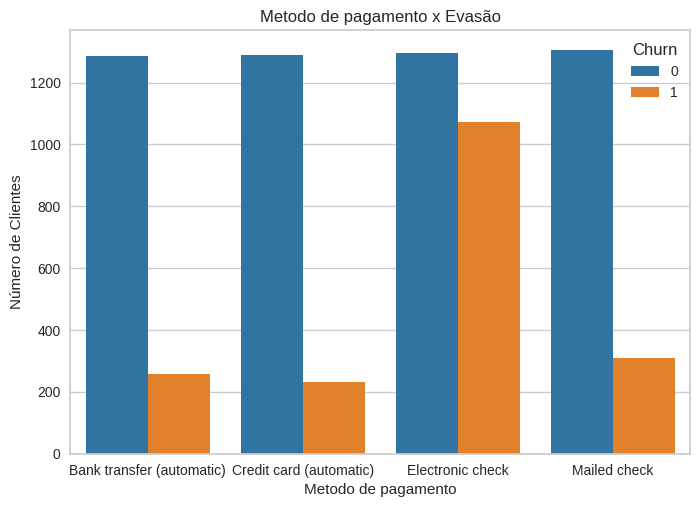

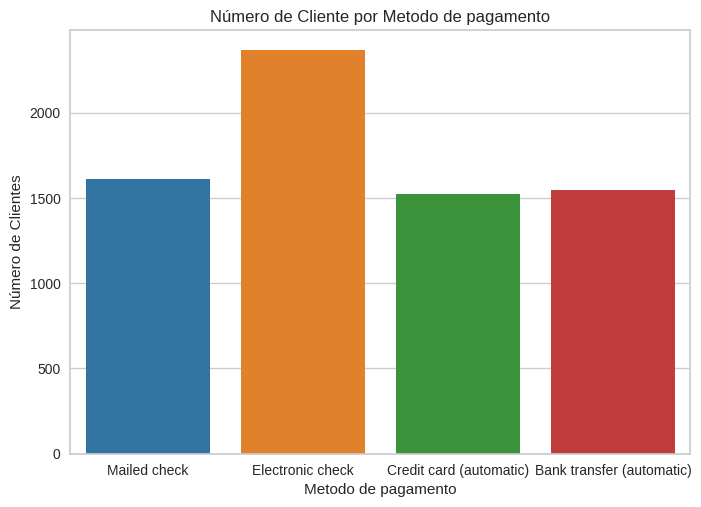

In [13]:
sns.barplot(x='PaymentMethod', y='Count', hue='Churn', data=tipo_pagamento, palette='tab10')
plt.title('Metodo de pagamento x Evasão')
plt.xlabel('Metodo de pagamento')
plt.ylabel('Número de Clientes')
plt.show()


sns.countplot(x='PaymentMethod', data=dados, palette='tab10')
plt.title('Número de Cliente por Metodo de pagamento')
plt.xlabel('Metodo de pagamento')
plt.ylabel('Número de Clientes')
plt.show()


In [14]:
total_gasto = dados.groupby('Charges.Total')['Churn'].value_counts().reset_index()
total_gasto.columns = ['ChargesTotal', 'Churn', 'Count']
total_gasto

,ChargesTotal,Churn,Count
0,0.00,0,11
1,18.80,0,1
2,18.85,0,1
3,18.85,1,1
4,18.90,0,1
...,...,...,...
6693,8564.75,0,1
6694,8594.40,0,1
6695,8670.10,0,1
6696,8672.45,0,1


Text(0.5, 1.0, 'Total Gasto x Evasão')

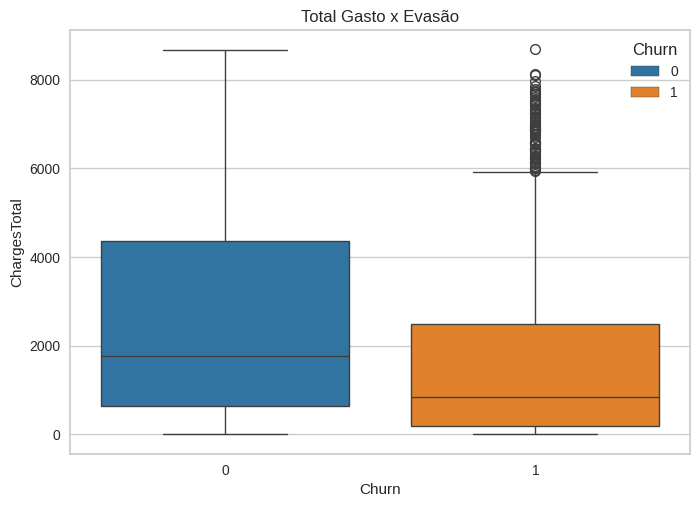

In [15]:
sns.boxplot(total_gasto,x='Churn',y='ChargesTotal',hue='Churn',palette='tab10')
plt.title('Total Gasto x Evasão')

In [16]:
tempo_contrato = dados.groupby('tenure')['Churn'].value_counts().reset_index()
tempo_contrato.columns = ['Tenure', 'Churn', 'Count']
tempo_contrato

,Tenure,Churn,Count
0,0,0,11
1,1,1,380
2,1,0,233
3,2,1,123
4,2,0,115
...,...,...,...
140,70,1,11
141,71,0,164
142,71,1,6
143,72,0,356


Text(0.5, 1.0, 'Tempo de Contrato x Evasão')

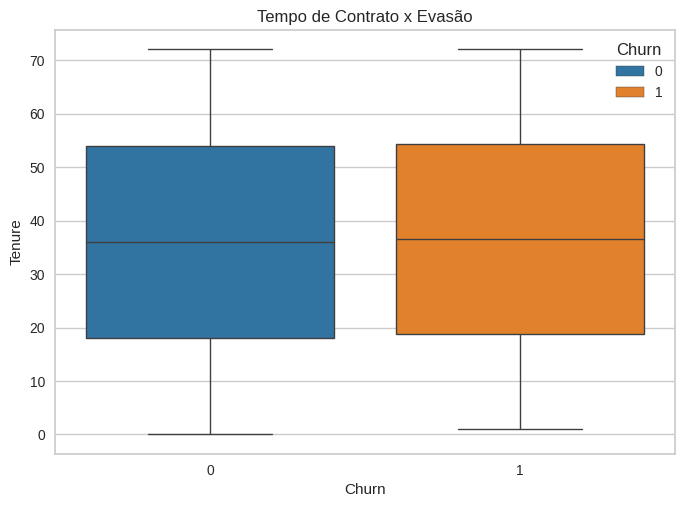

In [17]:
sns.boxplot(tempo_contrato,x='Churn',y='Tenure',hue='Churn',palette='tab10')
plt.title('Tempo de Contrato x Evasão')

##

In [18]:
X = dados.drop(columns='Churn')
y = dados['Churn']

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


one_hot_encoder = make_column_transformer(
    (OneHotEncoder(drop='if_binary'),
     ['gender','InternetService','Contract','PaymentMethod']
     ),
    ('drop', ['customerID']),
    remainder='passthrough',
    sparse_threshold=0
)
X_encoded = one_hot_encoder.fit_transform(X)
X_encoded = pd.DataFrame(X_encoded, columns=one_hot_encoder.get_feature_names_out())

In [20]:
X_encoded

,onehotencoder__gender_Male,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,...,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Charges.Diary
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30,2.19
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40,2.00
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85,2.46
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85,3.27
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90,1.84
7039,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70,2.84
7040,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75,1.68
7041,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65,2.26


In [21]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   onehotencoder__gender_Male                              7043 non-null   float64
 1   onehotencoder__InternetService_DSL                      7043 non-null   float64
 2   onehotencoder__InternetService_Fiber optic              7043 non-null   float64
 3   onehotencoder__InternetService_No                       7043 non-null   float64
 4   onehotencoder__Contract_Month-to-month                  7043 non-null   float64
 5   onehotencoder__Contract_One year                        7043 non-null   float64
 6   onehotencoder__Contract_Two year                        7043 non-null   float64
 7   onehotencoder__PaymentMethod_Bank transfer (automatic)  7043 non-null   float64
 8   onehotencoder__PaymentMethod_Credit ca

In [22]:
X_encoded.corr()

,onehotencoder__gender_Male,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,...,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Charges.Diary
onehotencoder__gender_Male,1.000000,0.006568,-0.011286,0.006026,-0.003386,0.008026,-0.003695,-0.016024,0.001215,0.000752,...,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,-0.011754,-0.014569,-0.000080,-0.014618
onehotencoder__InternetService_DSL,0.006568,1.000000,-0.640987,-0.380635,-0.065509,0.046795,0.031714,0.025476,0.051438,-0.104418,...,0.321269,0.157884,0.146291,0.313118,0.016274,0.025698,-0.063121,-0.160189,-0.052469,-0.160211
onehotencoder__InternetService_Fiber optic,-0.011286,-0.640987,1.000000,-0.465793,0.244164,-0.076324,-0.211526,-0.022624,-0.050077,0.336410,...,-0.030696,0.165651,0.176049,-0.020492,0.329349,0.322923,0.326853,0.787066,0.361655,0.787091
onehotencoder__InternetService_No,0.006026,-0.380635,-0.465793,1.000000,-0.218639,0.038004,0.218278,-0.002113,0.001030,-0.284917,...,-0.333403,-0.381593,-0.380754,-0.336298,-0.415552,-0.418675,-0.321013,-0.763557,-0.375223,-0.763562
onehotencoder__Contract_Month-to-month,-0.003386,-0.065509,0.244164,-0.218639,1.000000,-0.568744,-0.622633,-0.179707,-0.204145,0.331661,...,-0.246679,-0.164172,-0.225662,-0.285241,-0.112282,-0.116633,0.169096,0.060165,-0.444255,0.060235
onehotencoder__Contract_One year,0.008026,0.046795,-0.076324,0.038004,-0.568744,1.000000,-0.289510,0.057451,0.067589,-0.109130,...,0.100162,0.083722,0.102495,0.095775,0.061612,0.064926,-0.051391,0.004904,0.170814,0.004849
onehotencoder__Contract_Two year,-0.003695,0.031714,-0.211526,0.218278,-0.622633,-0.289510,1.000000,0.154471,0.173265,-0.282138,...,0.191773,0.111400,0.165096,0.240824,0.072049,0.073960,-0.147889,-0.074681,0.354481,-0.074710
onehotencoder__PaymentMethod_Bank transfer (automatic),-0.016024,0.025476,-0.022624,-0.002113,-0.179707,0.057451,0.154471,1.000000,-0.278215,-0.376762,...,0.095158,0.087004,0.083115,0.101252,0.046252,0.048652,-0.016332,0.042812,0.185987,0.042785
onehotencoder__PaymentMethod_Credit card (automatic),0.001215,0.051438,-0.050077,0.001030,-0.204145,0.067589,0.173265,-0.278215,1.000000,-0.373322,...,0.115721,0.090785,0.111554,0.117272,0.040433,0.048575,-0.013589,0.030550,0.182915,0.030547
onehotencoder__PaymentMethod_Electronic check,0.000752,-0.104418,0.336410,-0.284917,0.331661,-0.109130,-0.282138,-0.376762,-0.373322,1.000000,...,-0.112338,-0.000408,-0.003351,-0.114839,0.144626,0.137966,0.208865,0.271625,-0.059246,0.271650


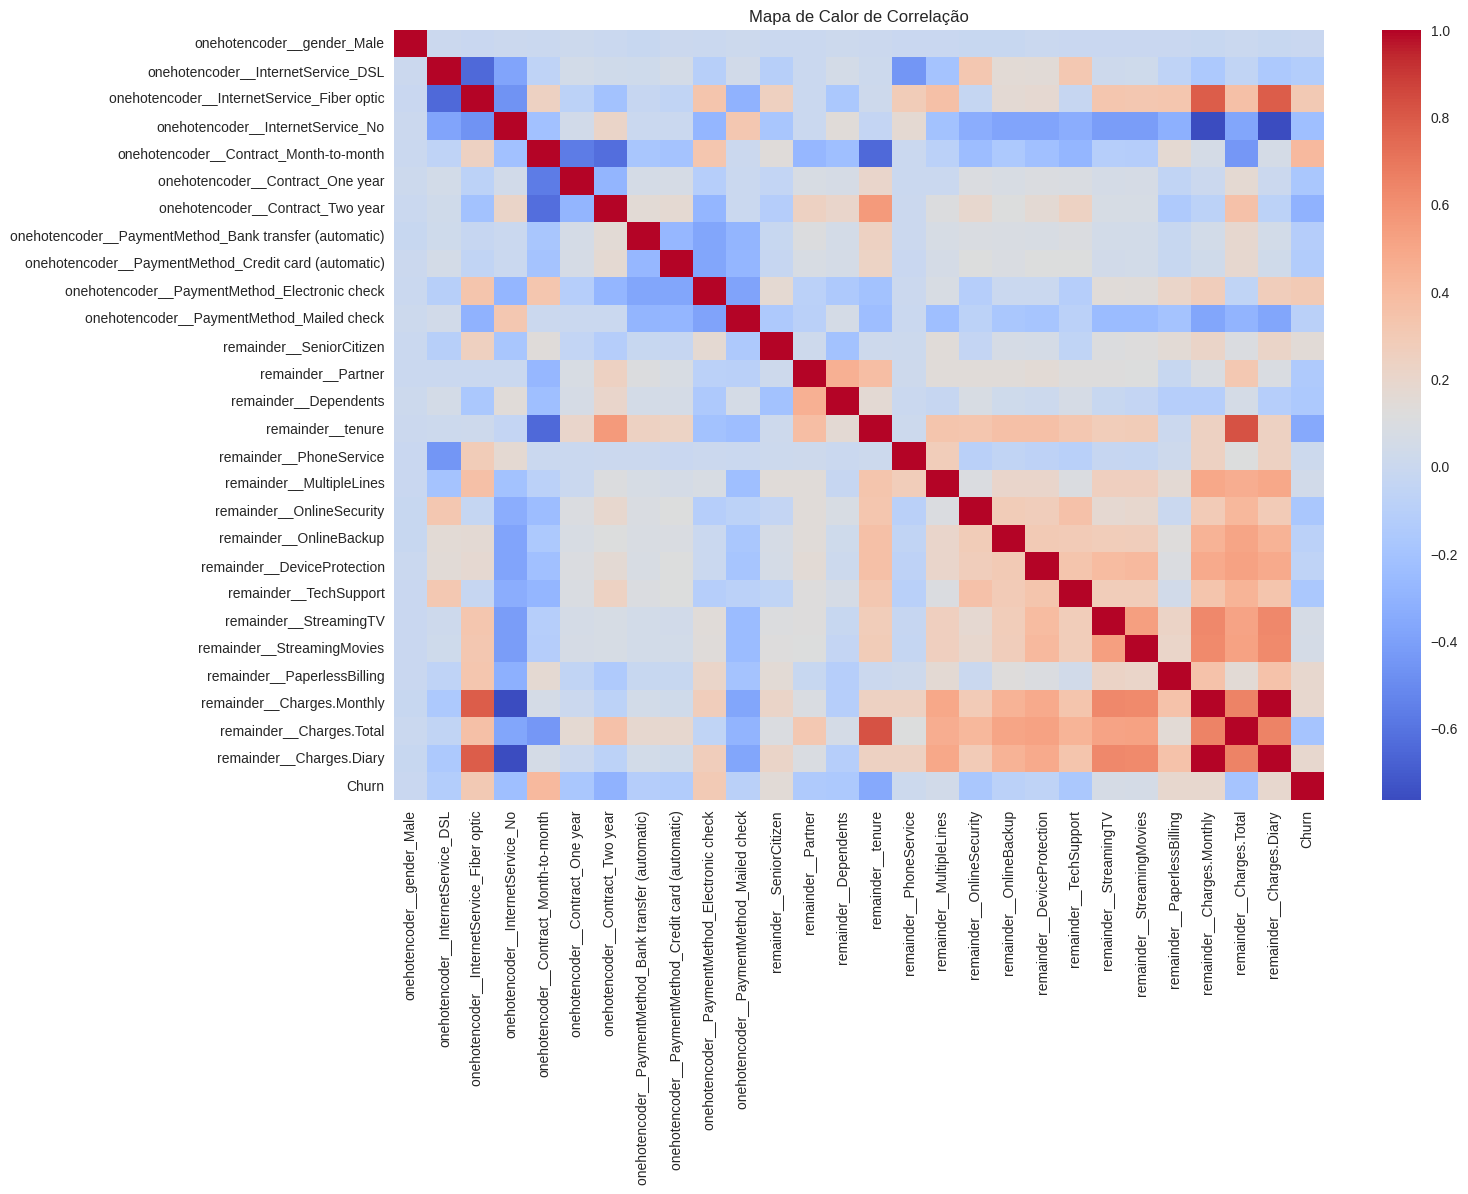

In [52]:
dados_corr = pd.concat([X_encoded, y], axis=1)

correlacao = dados_corr.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlacao, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlação")
plt.show()

## Criação e teste de modelos

### Modelo Dummy

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,train_size = 0.7, random_state=42)

In [24]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score


modelo_dummy = DummyClassifier()
modelo_dummy.fit(X_train, y_train)
modelo_dummy.score(X_test, y_test)

y_pred_dummy = modelo_dummy.predict(X_test)
acuracia_dummy = accuracy_score(y_test, y_pred_dummy)
print(f"Acurácia: {acuracia_dummy:.4f}")

Acurácia: 0.7392


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dummy))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1562
           1       0.00      0.00      0.00       551

    accuracy                           0.74      2113
   macro avg       0.37      0.50      0.43      2113
weighted avg       0.55      0.74      0.63      2113



### Modelo Linear Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



modelo_linear = LogisticRegression()
modelo_linear.fit(X_train_scaled, y_train)
modelo_linear.score(X_test_scaled, y_test)

y_pred_linear = modelo_linear.predict(X_test_scaled)
acuracia_linear = accuracy_score(y_test, y_pred_linear)
print(f"Acurácia: {acuracia_linear:.4f}")

Acurácia: 0.8164


In [27]:
coeficientes = pd.DataFrame(modelo_linear.coef_[0],
                           index=X_train.columns,
                           columns=['Coeficiente']).sort_values(by='Coeficiente', ascending=False)
print(coeficientes)

                                                    Coeficiente
remainder__Charges.Total                               0.823689
onehotencoder__InternetService_Fiber optic             0.427743
onehotencoder__Contract_Month-to-month                 0.340931
remainder__MultipleLines                               0.170790
remainder__StreamingTV                                 0.157783
remainder__PaperlessBilling                            0.152008
onehotencoder__PaymentMethod_Electronic check          0.127991
remainder__StreamingMovies                             0.117467
remainder__SeniorCitizen                               0.062127
remainder__DeviceProtection                            0.016673
remainder__Partner                                     0.006310
onehotencoder__Contract_One year                      -0.014997
onehotencoder__gender_Male                            -0.023950
onehotencoder__PaymentMethod_Mailed check             -0.036346
onehotencoder__PaymentMethod_Bank transf

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1562
           1       0.67      0.57      0.62       551

    accuracy                           0.82      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.82      0.81      2113



### Modelo KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier()
modelo_knn.fit(X_train_scaled, y_train)
modelo_knn.score(X_test_scaled, y_test)

y_pred_knn = modelo_knn.predict(X_test_scaled)
acuracia_knn = accuracy_score(y_test, y_pred_knn)
print(f"Acurácia: {acuracia_knn:.4f}")

Acurácia: 0.7586


In [30]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1562
           1       0.54      0.52      0.53       551

    accuracy                           0.76      2113
   macro avg       0.69      0.68      0.68      2113
weighted avg       0.76      0.76      0.76      2113



### Modelo Árvore de decisão

In [31]:
from sklearn.tree import DecisionTreeClassifier

modelo_arvore = DecisionTreeClassifier(max_depth=3)
modelo_arvore.fit(X_train, y_train)
modelo_arvore.score(X_test, y_test)

y_pred_arvore = modelo_arvore.predict(X_test)
acuracia_arvore = accuracy_score(y_test, y_pred_arvore)
print(f"Acurácia: {acuracia_arvore:.4f}")

Acurácia: 0.7903


In [32]:
print(classification_report(y_test, y_pred_arvore))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1562
           1       0.69      0.35      0.47       551

    accuracy                           0.79      2113
   macro avg       0.75      0.65      0.67      2113
weighted avg       0.78      0.79      0.76      2113



### Modelo RandomForestClassifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(max_depth=3, class_weight='balanced',random_state=42)
modelo_rf.fit(X_train, y_train)
modelo_rf.score(X_test, y_test)

y_pred_rf = modelo_rf.predict(X_test)
acuracia_rf = accuracy_score(y_test, y_pred_arvore)
print(f"Acurácia: {acuracia_rf:.4f}")

Acurácia: 0.7903


In [34]:
print(classification_report(y_test, y_pred_arvore))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1562
           1       0.69      0.35      0.47       551

    accuracy                           0.79      2113
   macro avg       0.75      0.65      0.67      2113
weighted avg       0.78      0.79      0.76      2113



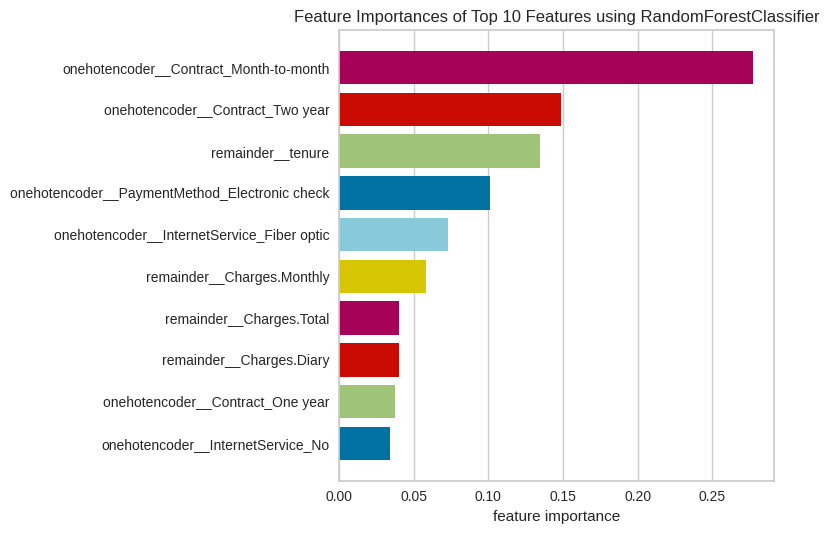

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [35]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(modelo_rf, relative=False, topn=10)
viz.fit(X_train, y_train)
viz.show()

In [36]:
importances = modelo_rf.feature_importances_

feature_importance = pd.DataFrame({'Feature' : X_encoded.columns, 'Importances' : importances}).sort_values(by='Importances', ascending=False)
feature_importance.head(10).round(4)

,Feature,Importances
4,onehotencoder__Contract_Month-to-month,0.2776
6,onehotencoder__Contract_Two year,0.1487
14,remainder__tenure,0.1347
9,onehotencoder__PaymentMethod_Electronic check,0.1008
2,onehotencoder__InternetService_Fiber optic,0.0728
24,remainder__Charges.Monthly,0.0579
25,remainder__Charges.Total,0.0403
26,remainder__Charges.Diary,0.0399
5,onehotencoder__Contract_One year,0.0376
3,onehotencoder__InternetService_No,0.0344


### GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV


parametros = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [3, 5, 8],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=modelo_rf, param_grid=parametros,scoring='recall',n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=3, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 8],
                         'n_estimators': [50, 100, 200]},
             scoring='recall')

In [38]:
print(f"Melhores Parâmetros: {grid_search.best_params_}")


print(f"Melhor Recall: {grid_search.best_score_:.4f}")
melhor_modelo_rf = grid_search.best_estimator_

Melhores Parâmetros: {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 50}
Melhor Recall: 0.8361


### Comparação de modelos

In [39]:
print(f"Acurácia Modelo Dummy: {acuracia_dummy:.4f}")
print(f'----------------------------------------')
print(f"Acurácia Modelo Linear: {acuracia_linear:.4f}")
print(f'----------------------------------------')
print(f"Acurácia Modelo KNN: {acuracia_knn:.4f}")
print(f'----------------------------------------')
print(f"Acurácia Modelo Árvore: {acuracia_arvore:.4f}")
print(f'----------------------------------------')
print(f"Acurácia Modelo Random Forest: {acuracia_rf:.4f}")
print(f'----------------------------------------')
print(f'Melhor Recall:{grid_search.best_score_:.4f}')
print(f'----------------------------------------')
print(f"Melhor Modelo Random Forest: {melhor_modelo_rf}")

Acurácia Modelo Dummy: 0.7392
----------------------------------------
Acurácia Modelo Linear: 0.8164
----------------------------------------
Acurácia Modelo KNN: 0.7586
----------------------------------------
Acurácia Modelo Árvore: 0.7903
----------------------------------------
Acurácia Modelo Random Forest: 0.7903
----------------------------------------
Melhor Recall:0.8361
----------------------------------------
Melhor Modelo Random Forest: RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, n_estimators=50, random_state=42)


### Salvando o modelo

In [40]:
import pickle

with open('modelo_rf.pkl', 'wb') as file:
    pickle.dump(melhor_modelo_rf, file)

In [41]:
with open('modelo_one_hot_encoder.pkl','wb') as file:
  pickle.dump(one_hot_encoder, file)

### Testando modelos

In [42]:
one_hot = pd.read_pickle('/content/modelo_one_hot_encoder.pkl')
rf = pd.read_pickle('/content/modelo_rf.pkl')

In [43]:
dados_novos_clientes = pd.DataFrame({
    'customerID': ['9999-ALTO', '8888-FIEL', '7777-MEDIO'],
    'gender': ['Male', 'Female', 'Male'],
    'SeniorCitizen': [0, 0, 1],
    'Partner': [0, 1, 1],
    'Dependents': [0, 1, 0],
    'tenure': [2, 70, 24],
    'PhoneService': [1, 1, 1],
    'MultipleLines': [0, 1, 0],
    'InternetService': ['Fiber optic', 'DSL', 'DSL'],
    'OnlineSecurity': [0, 1, 0],
    'OnlineBackup': [0, 1, 1],
    'DeviceProtection': [0, 1, 0],
    'TechSupport': [0, 1, 0],
    'StreamingTV': [1, 0, 1],
    'StreamingMovies': [1, 0, 1],
    'Contract': ['Month-to-month', 'Two year', 'One year'],
    'PaperlessBilling': [1, 0, 1],
    'PaymentMethod': ['Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)'],
    'Charges.Monthly': [95.50, 65.20, 70.00],
    'Charges.Total': [191.00, 4564.00, 1680.00],
    'Charges.Diary': [3.18, 2.17, 2.33]
})

clientes_encoded = one_hot.transform(dados_novos_clientes)
novos_clientes = pd.DataFrame(clientes_encoded, columns = one_hot.get_feature_names_out())

previsoes = rf.predict(novos_clientes)
probabilidade = rf.predict_proba(novos_clientes)

In [44]:
print("--- Resultado das Previsões ---")
for i in range(len(dados_novos_clientes)):
    id_cliente = dados_novos_clientes['customerID'].iloc[i]
    status = "VAI SAIR (Churn)" if previsoes[i] == 1 else "VAI FICAR"
    prob_sair = probabilidade[i][1] * 100

    print(f"Cliente {id_cliente}: {status} (Risco de saída: {prob_sair:.1f}%)")

--- Resultado das Previsões ---
Cliente 9999-ALTO: VAI SAIR (Churn) (Risco de saída: 79.9%)
Cliente 8888-FIEL: VAI FICAR (Risco de saída: 11.8%)
Cliente 7777-MEDIO: VAI FICAR (Risco de saída: 29.6%)


# Relatório Final

##1. Avaliação e Desempenho dos Modelos Preditivos

Para prever a evasão de clientes (Churn), foram desenvolvidos e comparados múltiplos algoritmos de Machine Learning. O foco principal da avaliação foi a métrica de Recall (capacidade do modelo de identificar corretamente os clientes que realmente vão sair), combinada com a precisão global do modelo.

<br>

<ul>
<li>Regressão Logística: Apresentou um bom desempenho inicial e foi fundamental para entender o "peso" (coeficientes) de cada variável de forma linear.</li>

<li>KNN (K-Nearest Neighbors): Desempenho mediano. Exigiu escalonamento rigoroso dos dados, mas teve dificuldade em lidar com a complexidade das variáveis categóricas transformadas.</li>

<li>Árvore de Decisão: Trouxe alta explicabilidade visual, mas tendeu a estagnar a sua acurácia em torno dos 79%, apresentando limitações na captura de nuances complexas.</li>

<li>Random Forest (Modelo Campeão): Após a aplicação de otimização de hiperparâmetros (GridSearchCV) e do balanceamento de classes (class_weight='balanced'), este modelo entregou o melhor desempenho. Ele não apenas manteve uma acurácia próxima a 80%, mas também maximizou a detecção da classe minoritária (Churn), sendo escolhido como a solução final para a empresa.
</li>
</ul>

##2. Principais Fatores que Influenciam a Evasão

A análise de Feature Importance extraída do Random Forest e validada pelos coeficientes da Regressão Logística revelou que o Churn na Telecom X não é aleatório. Ele é fortemente guiado por quatro pilares principais:
<ul>
<li>Tipo de Contrato (Contract_Month-to-month): É o fator de maior impacto absoluto. Clientes sem fidelidade (contrato mês a mês) têm uma facilidade muito maior de cancelar o serviço ao menor sinal de insatisfação ou ao receberem ofertas da concorrência.</li>

<li>Serviço de Internet (InternetService_Fiber optic): De forma contra-intuitiva, clientes que utilizam Fibra Ótica cancelam mais do que os usuários de DSL. Isso levanta um alerta vermelho sobre a qualidade, estabilidade ou o preço desse serviço específico.</li>

<li>Tempo de Permanência (tenure): Existe uma correlação negativa forte entre o tempo de casa e a evasão. Os primeiros meses são críticos; clientes novos (baixo tenure) possuem o maior risco de saída. A partir do segundo ano, a base tende a se estabilizar.</li>

<li>Método de Pagamento (PaymentMethod_Electronic check): Clientes que realizam pagamentos manuais (cheque eletrônico) cancelam com mais frequência. A ausência da cobrança automática cria um momento mensal de "decisão de compra", onde o cliente pode reavaliar se deseja continuar com o serviço.</li>
</ul>

##3. Propostas de Estratégias de Retenção


Com base nos dados extraídos, a Telecom X deve adotar uma postura proativa, focando em neutralizar os gatilhos de evasão identificados. Propomos as seguintes iniciativas estratégicas:

<ul>
<h3>Incentivo à Fidelização (Foco no Contrato):</h3>

<li>Ação: Criar campanhas de upsell oferecendo descontos na mensalidade ou upgrade gratuito de velocidade para clientes "Mês a Mês" que aceitarem migrar para contratos de 1 ou 2 anos.

<h3>Auditoria Técnica e Comercial da Fibra Ótica:

<li>Ação: O time de Qualidade deve investigar a estabilidade do serviço de Fibra Ótica nas regiões com maior evasão. Paralelamente, o time de Marketing deve avaliar se o preço atual está competitivo em relação aos provedores locais.

<h3>Programa de Onboarding de Sucesso (Foco no Tenure):

<li>Ação: Implementar uma "Régua de Relacionamento" agressiva nos primeiros 90 dias do cliente (período de maior risco). Oferecer suporte técnico gratuito ou visitas de manutenção preventiva neste período inicial para garantir que a percepção de valor seja alta.

<h3>Estímulo ao Pagamento Automático:

<li>Ação: Oferecer pequenos benefícios (como bônus de internet ou isenção de taxas de instalação) para clientes que cadastrarem o Cartão de Crédito ou Débito em Conta Automático, reduzindo o atrito mensal de pagamento.


##Conclusão Executiva
O uso de modelagem preditiva transformou a forma como a Telecom X pode enxergar sua base. Ao invés de aplicar estratégias genéricas de retenção para todos os clientes, a empresa agora tem a capacidade de direcionar seu orçamento de marketing cirurgicamente para os perfis de alto risco (ex: Clientes novos, com fibra ótica e contrato mensal), maximizando o Retorno sobre o Investimento (ROI) das ações de salvamento.